In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

df=pd.read_csv("emp_att.csv")


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Indepedent variables that can be used: Age, gender, family history and benefits offered by employer


In [76]:
for col in df.columns:
    print(col)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [77]:
df.isnull().sum().sum()

0

In [78]:

df_no_enc = df
df_no_enc

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [79]:
#Unique values in each column
for i in df_no_enc.columns:
    print(i," : ",df_no_enc[i].unique())
print(len(df_no_enc.columns))

Age  :  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition  :  ['Yes' 'No']
BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate  :  [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 143

In [80]:

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [81]:
#label encoding
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for i in obj_df.columns:
  df[i]= label_encoder.fit_transform(df[i])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [82]:
#Unique values in each column
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Age  :  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition  :  [1 0]
BusinessTravel  :  [2 1 0]
DailyRate  :  [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 14

In [83]:
#MODELS

In [84]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [85]:
X = df.drop(['Attrition','EmployeeNumber'], axis = 1)
Y = df['Attrition']

In [86]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,4,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,4,1,...,4,80,0,17,3,2,9,6,0,8


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify = Y,test_size = 0.2,random_state = 2222)

In [88]:
X_Train = X_train
X_Test = X_test
Y_Train = Y_train
Y_Test = Y_test

In [89]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

KNN

In [90]:
K = [] 
training = [] 
test = [] 
scores = {}
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
for k in range(2, 25): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, Y_train) 
  
    training_score = clf.score(X_train, Y_train) 
    test_score = clf.score(X_test, Y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [91]:
for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.8784013605442177, 0.8401360544217688]
3 : [0.8971088435374149, 0.8231292517006803]
4 : [0.8664965986394558, 0.8299319727891157]
5 : [0.8775510204081632, 0.8333333333333334]
6 : [0.8579931972789115, 0.8367346938775511]
7 : [0.8673469387755102, 0.8333333333333334]
8 : [0.8554421768707483, 0.8401360544217688]
9 : [0.8605442176870748, 0.8401360544217688]
10 : [0.8528911564625851, 0.8435374149659864]
11 : [0.858843537414966, 0.8435374149659864]
12 : [0.8520408163265306, 0.8435374149659864]
13 : [0.8562925170068028, 0.8401360544217688]
14 : [0.8520408163265306, 0.8401360544217688]
15 : [0.8537414965986394, 0.8401360544217688]
16 : [0.8486394557823129, 0.8401360544217688]
17 : [0.8511904761904762, 0.8401360544217688]
18 : [0.8469387755102041, 0.8401360544217688]
19 : [0.8477891156462585, 0.8401360544217688]
20 : [0.842687074829932, 0.8401360544217688]
21 : [0.8460884353741497, 0.8401360544217688]
22 : [0.8418367346938775, 0.8401360544217688]
23 : [0.8452380952380952, 0.8401360544217688

Mean Absolute Error: 0.1564625850340136
Mean Squared Error: 0.1564625850340136
Root Mean Squared Error: 0.3955535172818131
accuracy =  84.35374149659864
p =  0.7238754325259515
r =  0.5278663106210699
f1 =  0.5147818599311137
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.60      0.06      0.12        47

    accuracy                           0.84       294
   macro avg       0.72      0.53      0.51       294
weighted avg       0.81      0.84      0.79       294



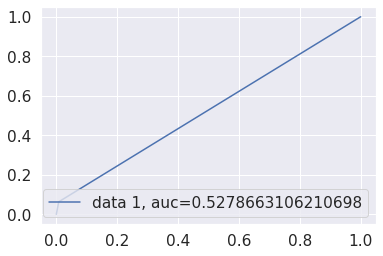

In [92]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_knn)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_knn=accuracy_score(Y_test, Y_pred_knn)
f1_knn=f1_score(Y_test, Y_pred_knn, average="macro")
p_knn=precision_score(Y_test, Y_pred_knn, average="macro")
r_knn=recall_score(Y_test, Y_pred_knn, average="macro")
print("accuracy = ",100*accuracy_knn)
print("p = ",p_knn)
print("r = ",r_knn)
print("f1 = ",f1_knn)
print(classification_report(Y_test, Y_pred_knn))
# Plot ROC curve
fpr_knn, tpr_knn, _ = metrics.roc_curve(Y_test,  Y_pred_knn)
auc_knn = metrics.roc_auc_score(Y_test,  Y_pred_knn)
plt.plot(fpr_knn,tpr_knn,label="data 1, auc="+str(auc_knn))
plt.legend(loc=4)
plt.show()

Logistic Regression

Mean Absolute Error: 0.1292517006802721
Mean Squared Error: 0.1292517006802721
Root Mean Squared Error: 0.35951592548908334
accuracy =  87.07482993197279
p =  0.8084210526315789
r =  0.6388147127228874
f1 =  0.6757227446882619
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.74      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.81      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



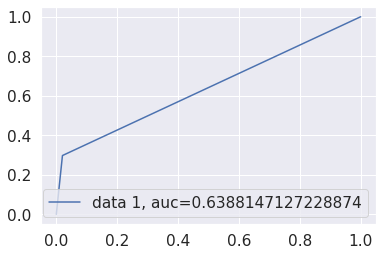

In [93]:
logreg.fit(X_train,Y_train)
Y_pred_lg = logreg.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(Y_test, Y_pred_lg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_lg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_lg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_lg=accuracy_score(Y_test, Y_pred_lg)
f1_lg=f1_score(Y_test, Y_pred_lg, average="macro")
p_lg=precision_score(Y_test, Y_pred_lg, average="macro")
r_lg=recall_score(Y_test, Y_pred_lg, average="macro")
print("accuracy = ",100*accuracy_lg)
print("p = ",p_lg)
print("r = ",r_lg)
print("f1 = ",f1_lg)
print(classification_report(Y_test, Y_pred_lg))
# Plot ROC curve
fpr_lg, tpr_lg, _ = metrics.roc_curve(Y_test,  Y_pred_lg)
auc_lg = metrics.roc_auc_score(Y_test,  Y_pred_lg)
plt.plot(fpr_lg,tpr_lg,label="data 1, auc="+str(auc_lg))
plt.legend(loc=4)
plt.show()

Decision trees

Mean Absolute Error: 0.2755102040816326
Mean Squared Error: 0.2755102040816326
Root Mean Squared Error: 0.5248906591678238
accuracy =  72.44897959183673
p =  0.5356837606837607
r =  0.5431561719355672
f1 =  0.5372957429032195
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       247
           1       0.22      0.28      0.24        47

    accuracy                           0.72       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.75      0.72      0.74       294



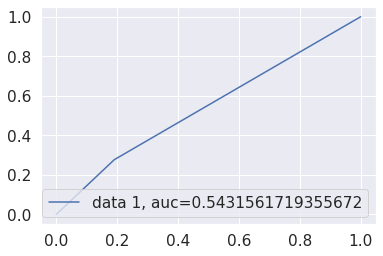

In [94]:
tree.fit(X_train,Y_train)
Y_pred_tree = tree.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(Y_test, Y_pred_tree)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_tree)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_tree=accuracy_score(Y_test, Y_pred_tree)
f1_tree=f1_score(Y_test, Y_pred_tree, average="macro")
p_tree=precision_score(Y_test, Y_pred_tree, average="macro")
r_tree=recall_score(Y_test, Y_pred_tree, average="macro")
print("accuracy = ",100*accuracy_tree)
print("p = ",p_tree)
print("r = ",r_tree)
print("f1 = ",f1_tree)
print(classification_report(Y_test, Y_pred_tree))
# Plot ROC curve
fpr_tree, tpr_tree, _ = metrics.roc_curve(Y_test,  Y_pred_tree)
auc_tree = metrics.roc_auc_score(Y_test,  Y_pred_tree)
plt.plot(fpr_tree,tpr_tree,label="data 1, auc="+str(auc_tree))
plt.legend(loc=4)
plt.show()

RANDOM FOREST

In [95]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=2222)

In [96]:
Y_pred = rf.predict(X_test)

In [97]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [98]:
cm

array([[245,   2],
       [ 44,   3]])

In [99]:
#evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.1564625850340136
Mean Squared Error: 0.1564625850340136
Root Mean Squared Error: 0.3955535172818131


In [100]:
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy=accuracy_score(Y_test, Y_pred)
f1=f1_score(Y_test, Y_pred, average="macro")
p=precision_score(Y_test, Y_pred, average="macro")
r=recall_score(Y_test, Y_pred, average="macro")
print("accuracy = ",100*accuracy)
print("p = ",p)
print("r = ",r)
print("f1 = ",f1)
print(classification_report(Y_test, Y_pred))

accuracy =  84.35374149659864
p =  0.7238754325259515
r =  0.5278663106210699
f1 =  0.5147818599311137
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.60      0.06      0.12        47

    accuracy                           0.84       294
   macro avg       0.72      0.53      0.51       294
weighted avg       0.81      0.84      0.79       294



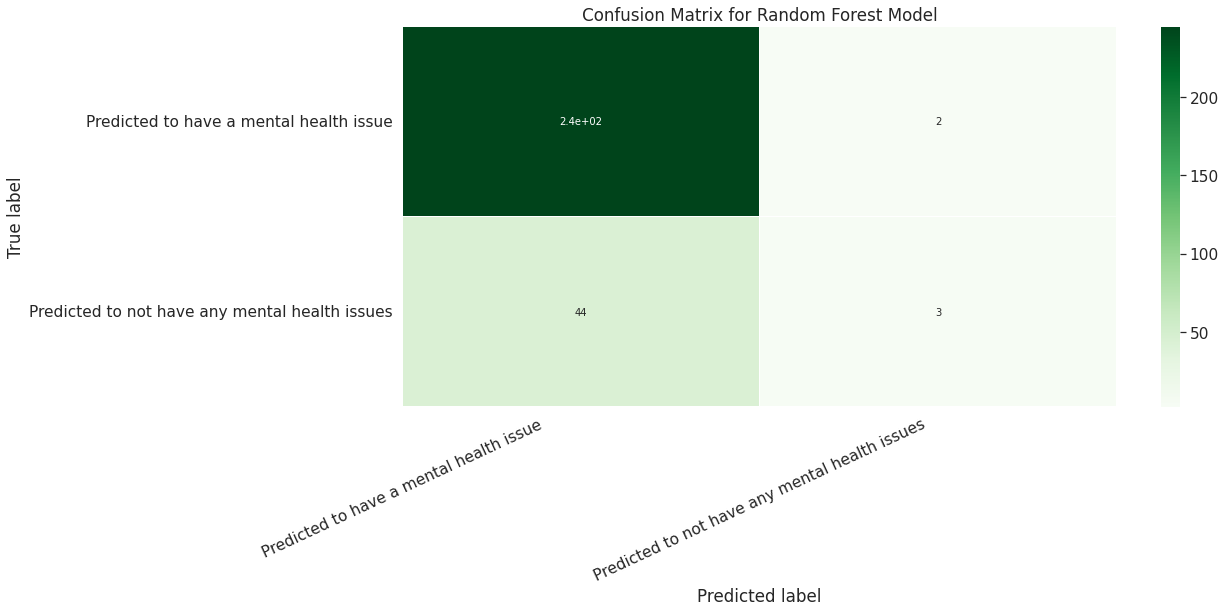

In [101]:
# Build the plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Predicted to have a mental health issue', 'Predicted to not have any mental health issues']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

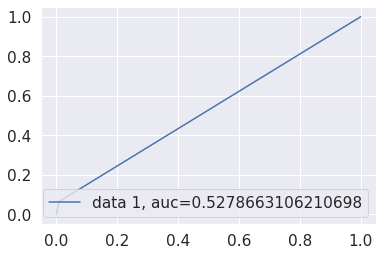

In [102]:
# Plot ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred)
auc = metrics.roc_auc_score(Y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


ADABOOST

In [103]:
ada.fit(X_train,Y_train)
Y_pred_ada = ada.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(Y_test, Y_pred_ada)
cm_ada

array([[234,  13],
       [ 29,  18]])

In [104]:
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_ada))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_ada))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ada)))

Mean Absolute Error: 0.14285714285714285
Mean Squared Error: 0.14285714285714285
Root Mean Squared Error: 0.3779644730092272


In [105]:
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_ada=accuracy_score(Y_test, Y_pred_ada)
f1_ada=f1_score(Y_test, Y_pred_ada, average="macro")
p_ada=precision_score(Y_test, Y_pred_ada, average="macro")
r_ada=recall_score(Y_test, Y_pred_ada, average="macro")
print("accuracy = ",100*accuracy_ada)
print("p = ",p_ada)
print("r = ",r_ada)
print("f1 = ",f1_ada)
print(classification_report(Y_test, Y_pred_ada))

accuracy =  85.71428571428571
p =  0.7351895007972525
r =  0.6651735722284434
f1 =  0.6895927601809955
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.58      0.38      0.46        47

    accuracy                           0.86       294
   macro avg       0.74      0.67      0.69       294
weighted avg       0.84      0.86      0.84       294



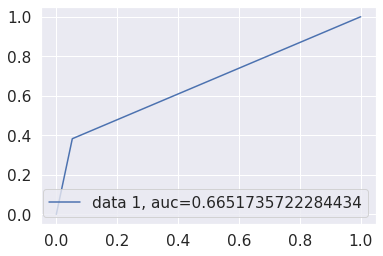

In [106]:
# Plot ROC curve
fpr_ada, tpr_ada, _ = metrics.roc_curve(Y_test,  Y_pred_ada)
auc_ada = metrics.roc_auc_score(Y_test,  Y_pred_ada)
plt.plot(fpr_ada,tpr_ada,label="data 1, auc="+str(auc_ada))
plt.legend(loc=4)
plt.show()


XGBOOST

Mean Absolute Error: 0.1292517006802721
Mean Squared Error: 0.1292517006802721
Root Mean Squared Error: 0.35951592548908334
accuracy =  87.07482993197279
p =  0.7985347985347986
r =  0.6474287190972521
f1 =  0.6840497737556561
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.71      0.32      0.44        47

    accuracy                           0.87       294
   macro avg       0.80      0.65      0.68       294
weighted avg       0.86      0.87      0.85       294



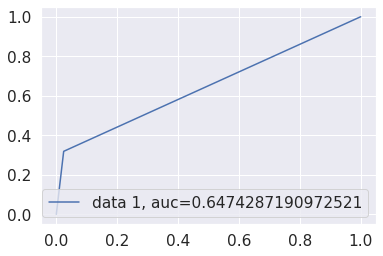

In [107]:
xgboost.fit(X_train,Y_train)
Y_pred_xg = xgboost.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(Y_test, Y_pred_xg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_xg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_xg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_xg=accuracy_score(Y_test, Y_pred_xg)
f1_xg=f1_score(Y_test, Y_pred_xg, average="macro")
p_xg=precision_score(Y_test, Y_pred_xg, average="macro")
r_xg=recall_score(Y_test, Y_pred_xg, average="macro")
print("accuracy = ",100*accuracy_xg)
print("p = ",p_xg)
print("r = ",r_xg)
print("f1 = ",f1_xg)
print(classification_report(Y_test, Y_pred_xg))
# Plot ROC curve
fpr_xg, tpr_xg, _ = metrics.roc_curve(Y_test,  Y_pred_xg)
auc_xg = metrics.roc_auc_score(Y_test,  Y_pred_xg)
plt.plot(fpr_xg,tpr_xg,label="data 1, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()

GRADIENT BOOSTING CLASSIFIER

Mean Absolute Error: 0.1326530612244898
Mean Squared Error: 0.1326530612244898
Root Mean Squared Error: 0.3642156795423418
accuracy =  86.73469387755102
p =  0.7820855614973261
r =  0.6454044275992764
f1 =  0.6798190500125659
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.68      0.32      0.43        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.85      0.87      0.85       294



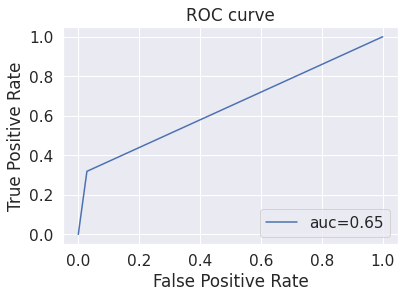

In [108]:
grad.fit(X_train,Y_train)
Y_pred_grad = grad.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_grad = confusion_matrix(Y_test, Y_pred_grad)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_grad))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_grad))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_grad)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_grad=accuracy_score(Y_test, Y_pred_grad)
f1_grad=f1_score(Y_test, Y_pred_grad, average="macro")
p_grad=precision_score(Y_test, Y_pred_grad, average="macro")
r_grad=recall_score(Y_test, Y_pred_grad, average="macro")
print("accuracy = ",100*accuracy_grad)
print("p = ",p_grad)
print("r = ",r_grad)
print("f1 = ",f1_grad)
print(classification_report(Y_test, Y_pred_grad))
# Plot ROC curve
fpr_grad, tpr_grad, _ = metrics.roc_curve(Y_test,  Y_pred_grad)
auc_grad = metrics.roc_auc_score(Y_test,  Y_pred_grad)
plt.plot(fpr_grad,tpr_grad,label="auc="+str(round(auc_grad,2)))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('grad_boost_roc.png')
plt.show()


K FOLD CROSS VALIDATION

In [109]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [110]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import StratifiedKFold
# rf = RandomForestClassifier(random_state = 2222)
# logreg = LogisticRegression()
# tree = DecisionTreeClassifier(random_state = 2222)
# knn = KNeighborsClassifier()
# ada = AdaBoostClassifier(random_state = 2222)
# grad = GradientBoostingClassifier(random_state = 2222)
# xgboost = XGBClassifier(random_state = 2222)

#kf=KFold(n_splits=10)
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)
#logreg_score=cross_val_score(logreg,X,Y,cv=kf)
logreg_score = cross_val_score(logreg, X_train, Y_train, cv = kf)
print("Cross Validation Scores are {}".format(logreg_score))
print("Average Cross Validation score :{}+/- {}".format(logreg_score.mean()*100,logreg_score.std()*100))

Cross Validation Scores are [0.86904762 0.85119048 0.88095238 0.88095238 0.86309524 0.8452381
 0.83333333]
Average Cross Validation score :86.05442176870747+/- 1.6792872158275074


In [111]:
#kf = StratifiedKFold(n_splits=15, shuffle=True, random_state=1)
rf_score=cross_val_score(rf,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(rf_score))
print("Average Cross Validation score :{}".format(rf_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(rf_score.mean()*100,rf_score.std()*100))

Cross Validation Scores are [0.85714286 0.86309524 0.86904762 0.86309524 0.83333333 0.86904762
 0.8452381 ]
Average Cross Validation score :0.8571428571428571
Average Cross Validation score :85.71428571428571+/- 1.2322599273970614


In [112]:
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
tree_score=cross_val_score(tree,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(tree_score))
print("Average Cross Validation score :{}".format(tree_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(tree_score.mean()*100,tree_score.std()*100))

Cross Validation Scores are [0.78571429 0.80952381 0.83333333 0.7797619  0.79166667 0.7202381
 0.73214286]
Average Cross Validation score :0.7789115646258502
Average Cross Validation score :77.89115646258502+/- 3.7298830271192718


In [113]:
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)
knn_score=cross_val_score(knn,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(knn_score))
print("Average Cross Validation score :{}+/- {}".format(knn_score.mean()*100,knn_score.std()*100))

Cross Validation Scores are [0.83928571 0.85119048 0.85119048 0.8452381  0.8452381  0.8452381
 0.83928571]
Average Cross Validation score :84.52380952380952+/- 0.4499577059633642


In [114]:
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)
ada_score=cross_val_score(ada,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(ada_score))
print("Average Cross Validation score :{}+/- {}".format(ada_score.mean()*100,ada_score.std()*100))

Cross Validation Scores are [0.86904762 0.8452381  0.89880952 0.89880952 0.85119048 0.88095238
 0.82738095]
Average Cross Validation score :86.73469387755102+/- 2.5396572318143016


In [115]:
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grad_score=cross_val_score(grad,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(grad_score))
print("Average Cross Validation score :{}+/- {}".format(grad_score.mean()*100,grad_score.std()*100))

Cross Validation Scores are [0.875      0.86904762 0.88095238 0.91071429 0.85119048 0.875
 0.83928571]
Average Cross Validation score :87.15986394557824+/- 2.1070598117965753


In [116]:
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)
xgboost_score=cross_val_score(xgboost,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(xgboost_score))
print("Average Cross Validation score :{}+/- {}".format(xgboost_score.mean()*100,xgboost_score.std()*100))

Cross Validation Scores are [0.875      0.88690476 0.88095238 0.89285714 0.85714286 0.86309524
 0.85714286]
Average Cross Validation score :87.3299319727891+/- 1.3391169853761598


**recommendation**

shap!!

In [117]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [119]:
# Initialize JavaScript visualization - use Jupyter notebook to see the interactive features of the plots
shap.initjs()

In [120]:
# Create a TreeExplainer and extract shap values from it - will be used for plotting later
xgboost.fit(X,Y)
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X)

In [121]:
import matplotlib.pyplot as pl


In [148]:
# # shap force plot for the first prediction. Here we want to interpret the output value for the 1st observation in our dataframe. 
# import matplotlib.pyplot as plt1
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [149]:
# import matplotlib.pyplot as plt1
# shap.initjs()

# shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])



In [150]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[18,:], X.iloc[18,:])

In [151]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[27,:], X.iloc[27,:])

In [152]:
# shap.initjs()
# # SHAP values for all predictions and the direction of their impact
# shap.force_plot(explainer.expected_value, shap_values, X)

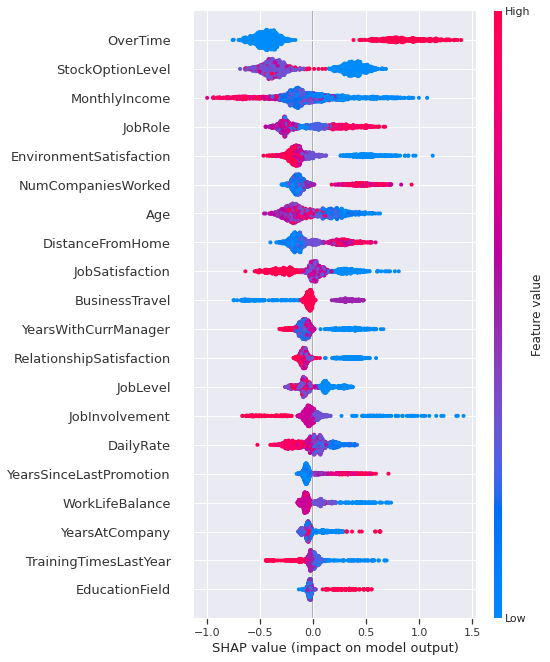

In [127]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values, X)

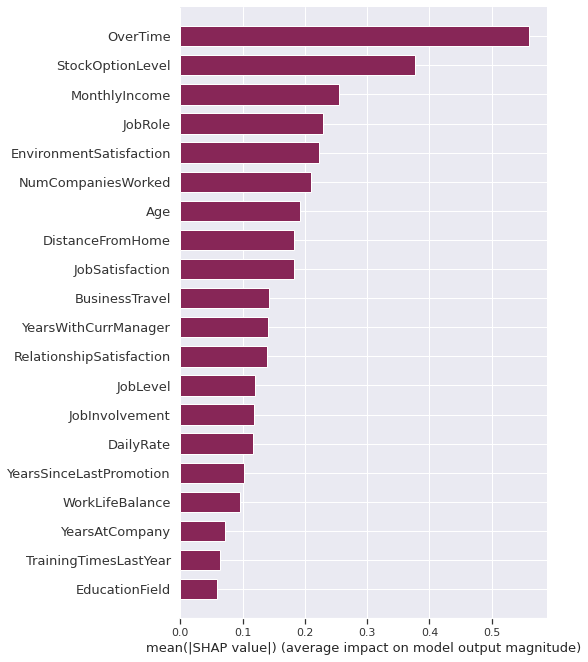

In [128]:
shap.summary_plot(shap_values, X, plot_type="bar",color='#872657')

In [129]:
feature_names = X_Train.columns
xgb_results = pd.DataFrame(shap_values, columns = feature_names)
values = np.abs(xgb_results.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, values)), columns=['Column','FeatureImportanceValues'])
shap_importance.sort_values(by=['FeatureImportanceValues'], ascending=False, inplace=True)
shap_importance.head()

,Column,FeatureImportanceValues
20,OverTime,0.560735
25,StockOptionLevel,0.377500
16,MonthlyIncome,0.255367
13,JobRole,0.229907
8,EnvironmentSatisfaction,0.222034


recommendation system

In [130]:
recs = []
for i in range(1470):
    shap_list = list(shap_values[i])
    max_shap = max(shap_list)
    index = shap_list.index(max_shap)
    label = X.columns[index]
    recs.append(label)

In [131]:
df_recs = pd.read_csv('emp_att.csv')
df_recs['AttritionCause'] = recs
df_recs.head(5)
df_recs.to_csv('emp_att_recs.csv')

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [133]:
data = pd.read_csv('emp_att_recs_filled.csv')
x = 0
for col in data.columns:
    print(col, '  =  ',type(col))
    x+=1
print(x)

Age   =   <class 'str'>
Attrition   =   <class 'str'>
BusinessTravel   =   <class 'str'>
DailyRate   =   <class 'str'>
Department   =   <class 'str'>
DistanceFromHome   =   <class 'str'>
Education   =   <class 'str'>
EducationField   =   <class 'str'>
EmployeeCount   =   <class 'str'>
EmployeeNumber   =   <class 'str'>
EnvironmentSatisfaction   =   <class 'str'>
Gender   =   <class 'str'>
HourlyRate   =   <class 'str'>
JobInvolvement   =   <class 'str'>
JobLevel   =   <class 'str'>
JobRole   =   <class 'str'>
JobSatisfaction   =   <class 'str'>
MaritalStatus   =   <class 'str'>
MonthlyIncome   =   <class 'str'>
MonthlyRate   =   <class 'str'>
NumCompaniesWorked   =   <class 'str'>
Over18   =   <class 'str'>
OverTime   =   <class 'str'>
PercentSalaryHike   =   <class 'str'>
PerformanceRating   =   <class 'str'>
RelationshipSatisfaction   =   <class 'str'>
StandardHours   =   <class 'str'>
StockOptionLevel   =   <class 'str'>
TotalWorkingYears   =   <class 'str'>
TrainingTimesLastYear   

In [134]:
descriptions = data['Age'].apply(str)+' '+data['BusinessTravel'].apply(str)+' '+data['DailyRate'].apply(str)+' '+data['Department'].apply(str)+' '+data['DistanceFromHome'].apply(str)+' '+data['Education'].apply(str)+' '+data['EducationField'].apply(str)+' '+data['EmployeeCount'].apply(str)+' '+data['EnvironmentSatisfaction'].apply(str)+' '+data['Gender'].apply(str)+' '+data['HourlyRate'].apply(str)+' '+data['JobInvolvement'].apply(str)+' '+data['JobLevel'].apply(str)+' '+data['JobRole'].apply(str)+' '+data['JobSatisfaction'].apply(str)+' '+data['MaritalStatus'].apply(str)+' '+data['MonthlyIncome'].apply(str)+' '+data['MonthlyRate'].apply(str)+' '+data['NumCompaniesWorked'].apply(str)+' '+data['Over18'].apply(str)+' '+data['OverTime'].apply(str)+' '+data['PercentSalaryHike'].apply(str)+' '+data['PerformanceRating'].apply(str)+' '+data['RelationshipSatisfaction'].apply(str)+' '+data['StandardHours'].apply(str)+' '+data['StockOptionLevel'].apply(str)+' '+data['TotalWorkingYears'].apply(str)+' '+data['TrainingTimesLastYear'].apply(str)+' '+data['WorkLifeBalance'].apply(str)+' '+data['YearsAtCompany'].apply(str)+' '+data['YearsInCurrentRole'].apply(str)+' '+data['YearsSinceLastPromotion'].apply(str)+' '+data['YearsWithCurrManager'].apply(str)




In [135]:
descriptions

0       18 Non-Travel 247 Research & Development 8 1 M...
1       18 Travel_Rarely 230 Research & Development 3 ...
2       18 Travel_Rarely 812 Sales 10 3 Medical 1 4 Fe...
3       18 Non-Travel 1124 Research & Development 1 3 ...
4       18 Non-Travel 1431 Research & Development 14 3...
                              ...                        
1465    60 Travel_Rarely 370 Research & Development 1 ...
1466    60 Travel_Rarely 422 Research & Development 7 ...
1467    60 Travel_Rarely 696 Sales 7 4 Marketing 1 2 M...
1468    60 Travel_Frequently 1499 Sales 28 3 Marketing...
1469    60 Travel_Rarely 1179 Sales 16 4 Marketing 1 1...
Length: 1470, dtype: object

In [136]:
def create_similarity_matrix(new_description, overall_descriptions):
    #Append the new description to the overall set.
    overall_descriptions.append(new_description)
    # Define a tfidf vectorizer and remove all stopwords.
    tfidf = TfidfVectorizer()
    #Convert tfidf matrix by fitting and transforming the data.
    tfidf_matrix = tfidf.fit_transform(overall_descriptions)
    # output the shape of the matrix.
    tfidf_matrix.shape
    # calculating the cosine similarity matrix.
    cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
    return cosine_sim

In [137]:
def get_recommendations(new_description,overall_descriptions):
    # create the similarity matrix
    cosine_sim = create_similarity_matrix(new_description,overall_descriptions)
    # Get pairwise similarity scores of all the students with new student.
    sim_scores = list(enumerate(cosine_sim[-1]))
    # Sort the descriptions based on similarity score.
    sim_scores = sorted(sim_scores,key =lambda x:x[1],reverse= True )
    # Get the scores of top 5 descriptions.
    sim_scores = sim_scores[1:6]
    # Get the student indices.
    indices = [i[0]for i in sim_scores]
    return data.iloc[indices]

In [138]:
new_description = pd.Series('20 Travel_Rarely 247 Sales 8 1 Life Sciences 1 3 Male 98 3 1 Sales Representative 4 Divorced 4171 26092 1 Y No 12 3 4 80 0 1 1 3 0 1 0 0')
results=get_recommendations(new_description,descriptions)


monthly income

In [139]:
DF=pd.read_csv('emp_att.csv')

In [140]:
avg_inc_att=DF[DF['Attrition']=='Yes']['MonthlyIncome'].mean()
avg_inc_no_att=DF[DF['Attrition']=='No']['MonthlyIncome'].mean()

In [141]:
avg_inc_att

4787.0928270042195

In [142]:
avg_inc_no_att

6832.739659367397

In [143]:
import plotly.graph_objects as go
x =['Yes', 'No']
fig = go.Figure(data=[go.Bar(x=x, y=[4787.093,6832.739],text=[str(x) for x in [4787.093,6832.739]])])
# Change the bar mode

fig.update_layout(xaxis_title='Attrition', yaxis_title='Average Montly Income')
fig.show()

satisfaction

In [144]:
emp_att=DF[DF['Attrition']=='Yes']['MonthlyIncome'].count()
emp_no_att=DF[DF['Attrition']=='No']['MonthlyIncome'].count()

In [145]:
job_no_sat_att=DF[(DF['Attrition']=='Yes') & ((DF['JobSatisfaction']==1) | (DF['JobSatisfaction']==2))]['MonthlyIncome'].count()
env_no_sat_att=DF[(DF['Attrition']=='Yes') & ((DF['EnvironmentSatisfaction']==1) | (DF['EnvironmentSatisfaction']==2))]['MonthlyIncome'].count()
rel_no_sat_att=DF[(DF['Attrition']=='Yes') & ((DF['RelationshipSatisfaction']==1) | (DF['RelationshipSatisfaction']==2))]['MonthlyIncome'].count()

In [146]:
job_sat_att=DF[(DF['Attrition']=='Yes') & ((DF['JobSatisfaction']==3) | (DF['JobSatisfaction']==4))]['MonthlyIncome'].count()
job_sat_att/emp_att

0.5274261603375527

In [147]:
import plotly.graph_objects as go
sat=[job_no_sat_att/emp_att,rel_no_sat_att/emp_att,env_no_sat_att/emp_att]
sat=[round(y*100,2) for y in sat]
x =['Employees dissatisfied with job', 'Employees dissatisfied with relationship', 'Employees dissatisfied with environment']
fig = go.Figure(data=[go.Bar(x=x, y=[round(y*100,2) for y in sat],text=[str(x)+"%" for x in sat])])
# Change the bar mode

fig.update_layout(xaxis_title='Disatisfaction at work', yaxis_title='Attrition percentage')
fig.show()